In [1]:
import pandas

In [5]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
plt.rcParams['figure.figsize'] = [20,10]

In [8]:
graduation = pandas.read_parquet('correctgradrates.parquet')

In [44]:
dropout = pandas.read_parquet('dropout_count.parquet')

In [60]:
dropout.head()

,Dropout_Count
CountyName,
Alameda,67080.0
Amador,336.0
Butte,12754.0
Calaveras,774.0
Colusa,820.0


In [67]:
grad_rates=dropout.merge(graduation,left_on="CountyName",right_on="CountyName")

In [69]:
grad_rates.head()

,CountyName,Dropout_Count,level_0,Dropout_Count_x,index,Dropout_Count_y,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
0,Alameda,67080.0,0,67080.0,0,67080.0,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,Amador,336.0,1,336.0,1,336.0,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
2,Butte,12754.0,2,12754.0,2,12754.0,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
3,Calaveras,774.0,3,774.0,3,774.0,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
4,Colusa,820.0,4,820.0,4,820.0,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [70]:
grad_rates.head()

,CountyName,Dropout_Count,level_0,Dropout_Count_x,index,Dropout_Count_y,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
0,Alameda,67080.0,0,67080.0,0,67080.0,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,Amador,336.0,1,336.0,1,336.0,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
2,Butte,12754.0,2,12754.0,2,12754.0,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
3,Calaveras,774.0,3,774.0,3,774.0,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
4,Colusa,820.0,4,820.0,4,820.0,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [64]:
graduation=graduation.reset_index()

In [65]:
from geosnap import datasets

In [71]:
counties=datasets.counties()

In [72]:
fips=pandas.read_csv("https://raw.githubusercontent.com/kjhealy/us-county/master/data/census/fips-by-state.csv",converters={"fips":str},encoding="latin1")

In [73]:
counties=counties.merge(fips,left_on="geoid",right_on="fips")

In [74]:
counties.name=counties.name.apply(lambda x:x[:-7])

In [75]:
counties=counties.merge(graduation, left_on="name", right_on="CountyName",how="right")

In [76]:
counties=counties[counties.state=="CA"]

In [77]:
counties.head()

,geoid,geometry,fips,name,state,level_0,CountyName,Dropout_Count_x,index,Dropout_Count_y,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,0,Alameda,67080.0,0,67080.0,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,1,Amador,336.0,1,336.0,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,2,Butte,12754.0,2,12754.0,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,3,Calaveras,774.0,3,774.0,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,4,Colusa,820.0,4,820.0,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [78]:
counties.columns

Index(['geoid', 'geometry', 'fips', 'name', 'state', 'level_0', 'CountyName',
       'Dropout_Count_x', 'index', 'Dropout_Count_y', 'Unnamed: 0',
       'Unnamed: 0.1', 'CountyCode', 'DistrictCode', 'SchoolCode',
       'Regular HS Diploma Graduates (Rate)', 'Dropoutrate'],
      dtype='object')

In [79]:
counties.rename(columns={"Regular HS Diploma Graduates (Rate)":"hsgradrate"},inplace=True)

<AxesSubplot:>

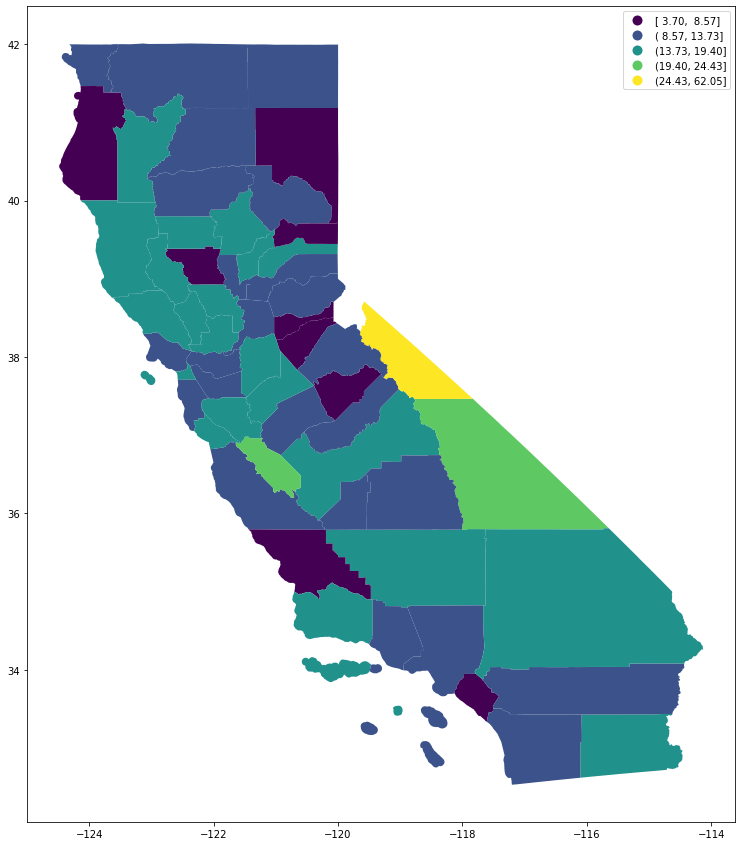

In [80]:
counties.plot(column='Dropoutrate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

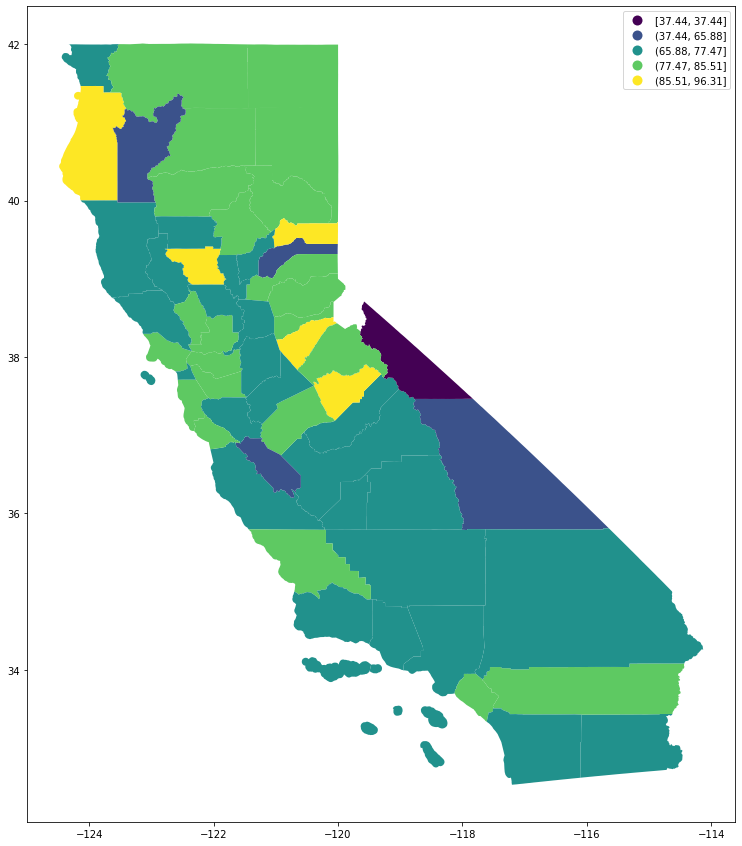

In [81]:
counties.plot(column='hsgradrate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

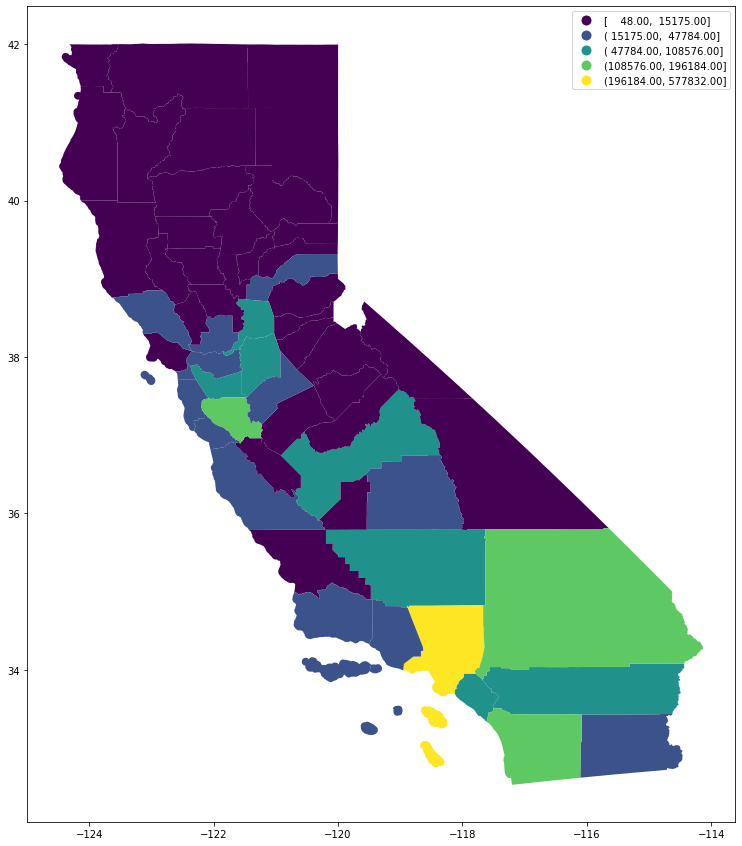

In [83]:
counties.plot(column='Dropout_Count_x', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [84]:
income = gpd.read_parquet('./income/ca_tract_incomes.parquet')

In [85]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037554001,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037554002,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037554101,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037554103,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037554104,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."


In [87]:
gpd.overlay(income,counties,how='intersection',keep_geom_type=None,make_valid=True)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,CountyCode,geometry,Unnamed: 0.1,name,hsgradrate,CountyName,median_household_income,fips,Dropout_Count_x,state,...,Dropout_Count_y,median_home_value,geoid,GEOID,index,Unnamed: 0,SchoolCode,level_0,DistrictCode,Dropoutrate
